## 1) Import Libraries


In [47]:
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['figure.dpi'] = 100

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import yellowbrick
from sklearn.metrics import classification_report, accuracy_score
from statsmodels.graphics.gofplots import qqplot
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from yellowbrick.classifier import PrecisionRecallCurve, ConfusionMatrix
from sklearn import metrics
from sklearn.model_selection import cross_validate

## 2) Data Analysis

In [48]:
df = pd.read_csv("data_new.csv") 
df.head()

,ACTIVITY,X0,X1,X2,X3,X4,X5,X6,X7,X8,...,ZMFCC11,ZMFCC12,XYCOS,XZCOS,YZCOS,XYCOR,XZCOR,YZCOR,RESULTANT,class
0,A,0.005,0.045,0.165,0.380,0.240,0.070,0.030,0.020,0.020,...,0.605240,0.597463,0.799349,0.046818,0.258132,0.380278,-0.253138,0.077059,11.0871,1601
1,A,0.010,0.060,0.165,0.405,0.215,0.065,0.025,0.020,0.025,...,0.615549,0.607639,0.781673,0.028650,0.248155,0.317421,-0.216656,0.141743,10.9427,1601
2,A,0.000,0.070,0.195,0.395,0.190,0.065,0.050,0.015,0.010,...,0.599809,0.592102,0.805913,0.024328,0.309101,0.403558,-0.267118,0.217244,11.0172,1601
3,A,0.005,0.055,0.220,0.410,0.165,0.055,0.055,0.030,0.000,...,0.598430,0.590741,0.777549,0.040502,0.332777,0.306777,-0.260409,0.238834,10.9355,1601
4,A,0.000,0.050,0.230,0.415,0.165,0.085,0.035,0.015,0.000,...,0.588640,0.581076,0.810781,0.093274,0.327170,0.396817,-0.137979,0.282769,10.8991,1601


In [49]:
df.columns 

Index(['ACTIVITY', 'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9',
       'Y0', 'Y1', 'Y2', 'Y3', 'Y4', 'Y5', 'Y6', 'Y7', 'Y8', 'Y9', 'Z0', 'Z1',
       'Z2', 'Z3', 'Z4', 'Z5', 'Z6', 'Z7', 'Z8', 'Z9', 'XAVG', 'YAVG', 'ZAVG',
       'XPEAK', 'YPEAK', 'ZPEAK', 'XABSOLDEV', 'YABSOLDEV', 'ZABSOLDEV',
       'XSTANDDEV', 'YSTANDDEV', 'ZSTANDDEV', 'XVAR', 'YVAR', 'ZVAR', 'XMFCC0',
       'XMFCC1', 'XMFCC2', 'XMFCC3', 'XMFCC4', 'XMFCC5', 'XMFCC6', 'XMFCC7',
       'XMFCC8', 'XMFCC9', 'XMFCC10', 'XMFCC11', 'XMFCC12', 'YMFCC0', 'YMFCC1',
       'YMFCC2', 'YMFCC3', 'YMFCC4', 'YMFCC5', 'YMFCC6', 'YMFCC7', 'YMFCC8',
       'YMFCC9', 'YMFCC10', 'YMFCC11', 'YMFCC12', 'ZMFCC0', 'ZMFCC1', 'ZMFCC2',
       'ZMFCC3', 'ZMFCC4', 'ZMFCC5', 'ZMFCC6', 'ZMFCC7', 'ZMFCC8', 'ZMFCC9',
       'ZMFCC10', 'ZMFCC11', 'ZMFCC12', 'XYCOS', 'XZCOS', 'YZCOS', 'XYCOR',
       'XZCOR', 'YZCOR', 'RESULTANT', 'class'],
      dtype='object')

In [50]:
df.isnull().sum() 



ACTIVITY     0
X0           0
X1           0
X2           0
X3           0
            ..
XYCOR        0
XZCOR        0
YZCOR        0
RESULTANT    0
class        0
Length: 93, dtype: int64

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8159 entries, 0 to 8158
Data columns (total 93 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ACTIVITY   8159 non-null   object 
 1   X0         8159 non-null   float64
 2   X1         8159 non-null   float64
 3   X2         8159 non-null   float64
 4   X3         8159 non-null   float64
 5   X4         8159 non-null   float64
 6   X5         8159 non-null   float64
 7   X6         8159 non-null   float64
 8   X7         8159 non-null   float64
 9   X8         8159 non-null   float64
 10  X9         8159 non-null   float64
 11  Y0         8159 non-null   float64
 12  Y1         8159 non-null   float64
 13  Y2         8159 non-null   float64
 14  Y3         8159 non-null   float64
 15  Y4         8159 non-null   float64
 16  Y5         8159 non-null   float64
 17  Y6         8159 non-null   float64
 18  Y7         8159 non-null   float64
 19  Y8         8159 non-null   float64
 20  Y9      

In [52]:
df.shape

(8159, 93)

In [53]:
df.describe().T 

,count,mean,std,min,25%,50%,75%,max
X0,8159.0,0.196351,0.336196,0.000000,0.000000,0.005000,0.205000,1.000000
X1,8159.0,0.188119,0.289718,0.000000,0.000000,0.025000,0.275000,1.000000
X2,8159.0,0.169204,0.257175,0.000000,0.000000,0.015000,0.265000,1.000000
X3,8159.0,0.103504,0.213464,0.000000,0.000000,0.000000,0.110000,1.000000
X4,8159.0,0.132044,0.280327,0.000000,0.000000,0.000000,0.105000,1.000000
...,...,...,...,...,...,...,...,...
XYCOR,8159.0,-0.051219,0.400001,-0.999833,-0.297154,-0.036654,0.202321,0.999643
XZCOR,8159.0,-0.014164,0.437920,-0.999487,-0.334778,-0.015339,0.296496,0.999756
YZCOR,8159.0,-0.011902,0.372265,-0.999803,-0.224940,-0.006016,0.209907,0.999203
RESULTANT,8159.0,10.197451,1.207586,9.116530,9.637945,9.850910,10.242700,20.931100


## 3) Data Visualization


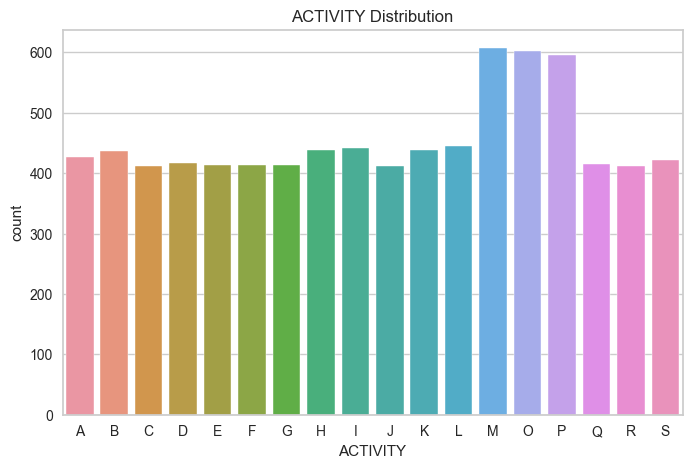

In [54]:
plt.figure(figsize = (8,5))
sns.countplot(x='ACTIVITY', data=df)
plt.xticks(rotation=0)
plt.title('ACTIVITY Distribution')
plt.show()

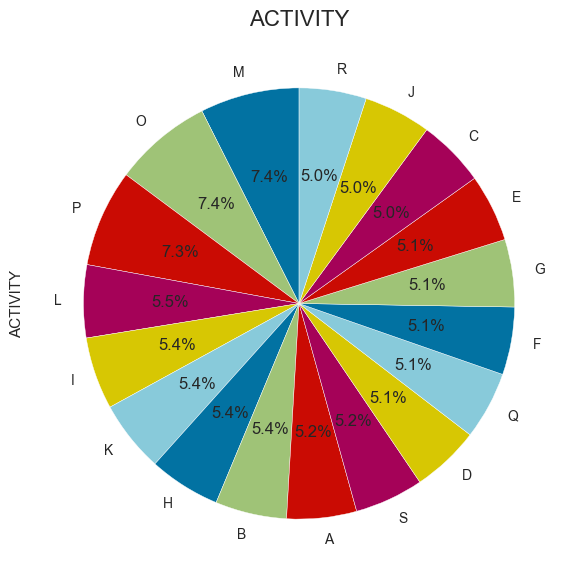

In [55]:
myexplode = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

df.ACTIVITY.value_counts().plot.pie(figsize=(7,7), labeldistance=1.1, explode=myexplode, autopct="%.1f%%", startangle=90)
plt.title("ACTIVITY", fontsize=16)

plt.show()

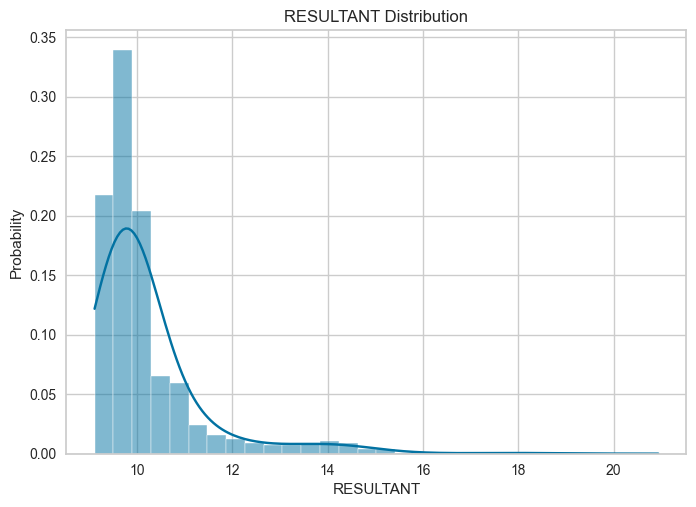

In [56]:
sns.histplot(df.RESULTANT, stat="probability", bins=30, kde=True, kde_kws={"bw_adjust":3})
plt.title('RESULTANT Distribution')
plt.show()

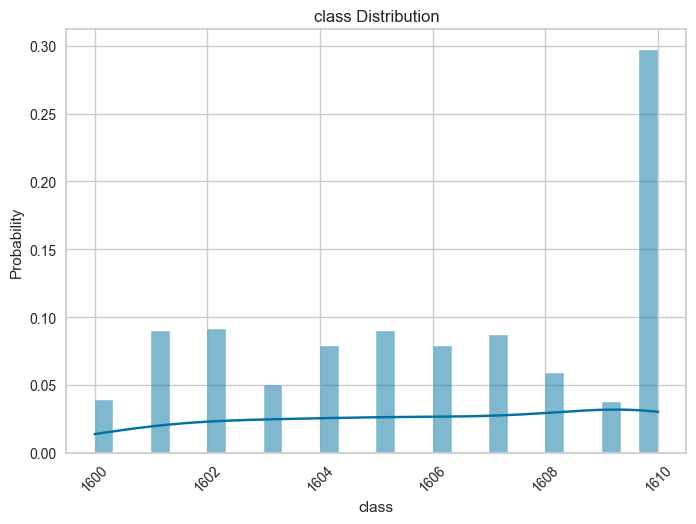

In [57]:
sns.histplot(df["class"], stat="probability", bins=30, kde=True, kde_kws={"bw_adjust":3})
plt.xticks(rotation=45)
plt.title('class Distribution')
plt.show()

## 4) Modeling

In [58]:
from sklearn.model_selection import train_test_split

X = df.drop(['ACTIVITY'], axis=1)
y = df["ACTIVITY"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state =42)

In [59]:
# Perform Label Encoding
le = LabelEncoder()
y = le.fit_transform(y)

In [60]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (4895, 92)
Train target shape   :  (4895,)
Test features shape  :  (3264, 92)
Test target shape    :  (3264,)


### 1. Logistic Regression

In [61]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)
pred_lr = lr.predict(X_test)

In [73]:
# accuracy score

lr_acc = accuracy_score(y_test, pred_lr)
print(f"Accuracy Score of Training Data is {lr_acc}")

Accuracy Score of Training Data is 0.27420343137254904


### 2. Neural Networks


In [63]:
from sklearn.neural_network import MLPClassifier
nn = MLPClassifier()
nn.fit(X_train, y_train)
y_pred_nn = nn.predict(X_test)

In [64]:
# accuracy score

nn_acc = accuracy_score(y_test, y_pred_nn)
print(f"Accuracy Score of Training Data is {nn_acc}")

Accuracy Score of Training Data is 0.46017156862745096


### 3. Decision Tree


In [65]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
pred_dt = dt.predict(X_test)

In [66]:
# accuracy score

dt_acc = accuracy_score(y_test, pred_dt)
print(f"Accuracy Score of Training Data is {dt_acc}")

Accuracy Score of Training Data is 0.8072916666666666


### 4. K-Nearest Neighbors (KNN)


In [67]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

In [68]:
# Accuracy score

knn_acc = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy Score of Training Data is {knn_acc}\n")

Accuracy Score of Training Data is 0.7401960784313726



### 5. Gradient Boosting

In [69]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

In [70]:
# Accuracy score

gb_acc = accuracy_score(y_test, y_pred_gb)
print(f"Accuracy Score of Training Data is {gb_acc}\n")

Accuracy Score of Training Data is 0.8673406862745098



## 5) Results

In [71]:
models = pd.DataFrame({'Model' : ['Logistic Regression', 'Neural Networks', 'Decision Tree', 'K-Nearest Neighbors (KNN)','Gradient Boosting'], 
                       'Score' : [lr_acc, nn_acc, dt_acc, knn_acc, gb_acc]})

models.sort_values(by = 'Score', ascending = False)

,Model,Score
4,Gradient Boosting,0.867341
2,Decision Tree,0.807292
3,K-Nearest Neighbors (KNN),0.740196
1,Neural Networks,0.460172
0,Logistic Regression,0.274203


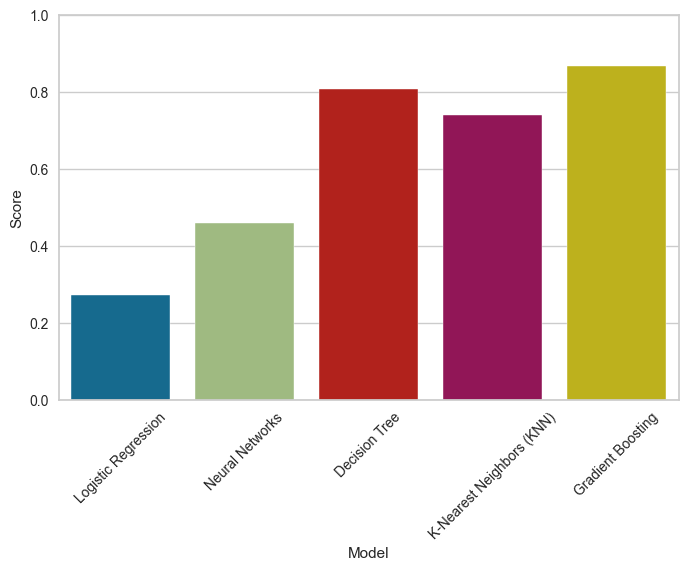

In [72]:
plt.figure(figsize = (8, 5))

sns.barplot(x = 'Model', y = 'Score', data = models)
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.show()